In [46]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.linalg.misc import norm
from numpy import *

#load data
def get_data(path):
    data = load_svmlight_file(path)
    return data[0], data[1]
#loss function
def compute_loss(X, y, w, C):
    loss = (np.linalg.norm(w,2)**2)/2 + C * np.mean(np.maximum(1 - y * X.dot(w.T), 0))
    return loss

In [47]:
path = "C:/Users/47864/Desktop/Data/australian_scale.txt"
X, y = get_data(path)

loss_train_history = []
loss_valid_history = []

In [48]:
X = np.hstack([X.toarray(), np.ones((X.shape[0], 1))])
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size = 0.3,  #hold-out
                                                      random_state = 0)
y_train = y_train.reshape(-1,1)

In [49]:
#initialize parameters
learning_rate = 0.005
num_round = 400
w = np.random.random((1,15)) #random initialization
C = 5

In [50]:
for item in range(num_round):
    loss_train = compute_loss(X_train, y_train, w, C)
    loss_train_history.append(loss_train)
    loss_valid = compute_loss(X_valid, y_valid, w, C)
    loss_valid_history.append(loss_valid)
    
    cond = 1 - y_train*X_train.dot(w.T)
    gw = np.zeros((1, X_train.shape[1])) #gradient of w
    for i in range(cond.shape[0]):
        if cond[i]>=0:
            gw += -y_train[i]*X_train[i].reshape((1,15))
        
    gw = C*gw/X_train.shape[0] + w
    w = w - learning_rate*gw #gradient descent

w: [[ 0.00594207  0.01776026  0.0394187   0.0795921   0.12730458  0.07669979
   0.07092018  0.87742154  0.12281802  0.0465154   0.01508042  0.14583387
  -0.01587872  0.00930932  0.12388915]]


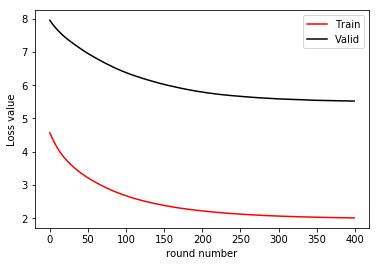

In [51]:
print("w:", w)
plt.plot(loss_train_history,'red',label='Train')
plt.plot(loss_valid_history,'black',label='Valid')
plt.xlabel('round number')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [52]:
y_ = X_train.dot(w.T) > 0 #prediction
count = 0 #correct count num
for i in range(X_train.shape[0]):
    if y_[i][0] == False and y_train[i]== -1:
        count = count + 1
    elif y_[i][0] == True and y_train[i]== 1:
        count = count + 1

acc_train = count / X_train.shape[0] #accuracy of training set
print("accuracy:", acc_train)

accuracy: 0.8509316770186336


In [53]:
y_ = X_valid.dot(w.T) > 0 #prediction
count = 0 #correct count num
for i in range(X_valid.shape[0]):
    if y_[i][0] == False and y_valid[i]== -1:
        count = count + 1
    elif y_[i][0] == True and y_valid[i]== 1:
        count = count + 1

acc_valid = count / y_valid.shape[0] #accuracy of training set
print("accuracy:", acc_valid)

accuracy: 0.8647342995169082
